# 8. Проверка знаний

Датасет содержит следующие признаки:

    age — возраст
    sex — пол (1 - мужчина, 0 - женщина)
    cp — тип боли в груди (4 значения)
    trestbps — артериальное давление в покое
    chol — холестерин сыворотки в мг/дл
    fbs — уровень сахара в крови натощак > 120 мг/дл
    restecg — результаты электрокардиографии в покое (значения 0,1,2)
    thalach — достигнута максимальная частота сердечных сокращений
    exang — стенокардия, вызванная физической нагрузкой
    oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
    slope — наклон пикового сегмента ST при нагрузке
    ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
    thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('data/heart.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
#df['age'] = df['age'].astype('float')
df['old'] = df['age'].apply(lambda x: 1 if x > 60  else 0) 

In [72]:
df['old'].sum()

79

In [78]:
import numpy as np

age_intervals = pd.cut(df.age, bins = [0, 20, 30, 40, 50, 60, np.inf])

treatbps_man = {0:123, 1:126, 2:129, 3:135, 4:142, 5:142}
treatbps_woman = {0:116, 1:120, 2:127, 3:137, 4:144, 5:169}

df['treatbps_mean'] = 0
df.loc[df.sex == 1, 'treatbps_mean'] = age_intervals.cat.codes.replace(treatbps_man)
df.loc[df.sex == 0, 'treatbps_mean'] = age_intervals.cat.codes.replace(treatbps_woman)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,treatbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,-114
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,-127
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,-119
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,-114
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,-112


In [79]:
df.loc[299:301, ['treatbps_mean']]

,treatbps_mean
299,-121
300,-114
301,-114


In [80]:
import category_encoders as ce

In [81]:
encoder = ce.OneHotEncoder() # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df_one = pd.concat([df, type_bin], axis=1)

In [82]:
df_one.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,old,treatbps_mean,cp,restecg,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,1,1,-114,3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,...,0,2,1,0,-127,2,1,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,...,0,2,1,0,-119,1,0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,...,0,2,1,0,-114,1,1,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,...,0,2,1,0,-112,0,1,2,0,2


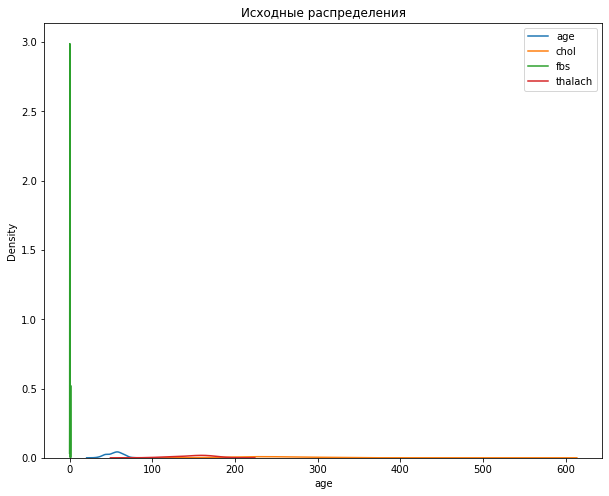

In [84]:
# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['age'], ax=ax1, label ='age')
#sns.kdeplot(df['trestbps '], ax=ax1, label ='trestbps')
sns.kdeplot(df['chol'], ax=ax1, label ='chol')
sns.kdeplot(df['fbs'], ax=ax1, label ='fbs')
sns.kdeplot(df['thalach'], ax=ax1, label ='thalach')

plt.legend()

In [88]:
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df[['age', 'chol', 'fbs', 'thalach']])

In [94]:
df_mm = pd.DataFrame(df_mm, columns=['age', 'chol', 'fbs', 'thalach'])

In [99]:
round(df_mm['chol'].std(),6)

0.118335

In [106]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df_one[['age', 'chol', 'fbs', 'thalach']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=['age', 'chol', 'fbs', 'thalach'])

In [107]:
round(df_r['chol'].std(),6)

0.816232

<AxesSubplot:>

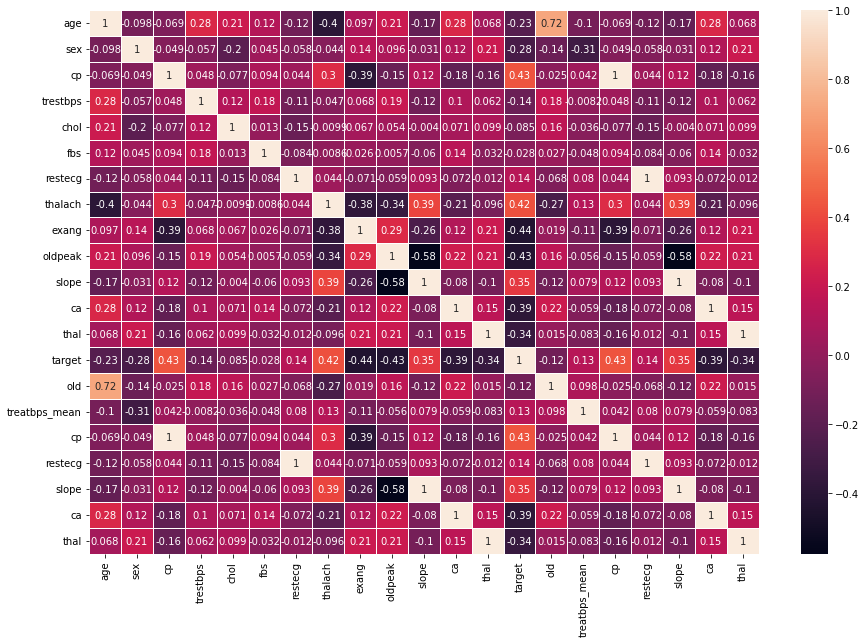

In [109]:
import pandas as pd
import seaborn as sns # импортируем seaborn для построения графиков

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_one.corr(), annot=True, linewidths=.5, ax=ax)